# San Francisco Housing Cost Analysis

In this assignment, you will perform fundamental analysis for the San Francisco housing market to allow potential real estate investors to choose rental investment properties.

In [206]:
# imports
import panel as pn
pn.extension('plotly')
import plotly.express as px
import pandas as pd
import hvplot.pandas
import matplotlib.pyplot as plt
import numpy as np
import os
from pathlib import Path
from dotenv import load_dotenv

import warnings
warnings.filterwarnings('ignore')

In [207]:
# Read the Mapbox API key
load_dotenv("mapbox.env")
mapbox_api = os.getenv("mapbox_api")

## Load Data

In [230]:
# Read the census data into a Pandas DataFrame
file_path = Path("Data/sfo_neighborhoods_census_data.csv")
sfo_data = pd.read_csv(file_path)
sfo_data.head()

,year,neighborhood,sale_price_sqr_foot,housing_units,gross_rent
0,2010,Alamo Square,291.182945,372560,1239
1,2010,Anza Vista,267.932583,372560,1239
2,2010,Bayview,170.098665,372560,1239
3,2010,Buena Vista Park,347.394919,372560,1239
4,2010,Central Richmond,319.027623,372560,1239


- - - 

## Housing Units Per Year

In this section, you will calculate the number of housing units per year and visualize the results as a bar chart using the Pandas plot function.

**Hint:** Use the Pandas `groupby` function.

**Optional challenge:** Use the min, max, and std to scale the y limits of the chart.



In [270]:
# Calculate the mean number of housing units per year (hint: use groupby) 
sfo_group = sfo_data.groupby("year").mean().reset_index()
sfo_group

,year,sale_price_sqr_foot,housing_units,gross_rent
0,2010,369.344353,372560.0,1239.0
1,2011,341.903429,374507.0,1530.0
2,2012,399.389968,376454.0,2324.0
3,2013,483.600304,378401.0,2971.0
4,2014,556.277273,380348.0,3528.0
5,2015,632.540352,382295.0,3739.0
6,2016,697.643709,384242.0,4390.0


In [210]:
# Save the dataframe as a csv file
sfo_group.to_csv(index=False)

'year,sale_price_sqr_foot,housing_units,gross_rent\n2010,369.34435332942974,372560.0,1239.0\n2011,341.9034291801058,374507.0,1530.0\n2012,399.3899684488192,376454.0,2324.0\n2013,483.6003042611177,378401.0,2971.0\n2014,556.2772734475082,380348.0,3528.0\n2015,632.5403520321692,382295.0,3739.0\n2016,697.643709116537,384242.0,4390.0\n'

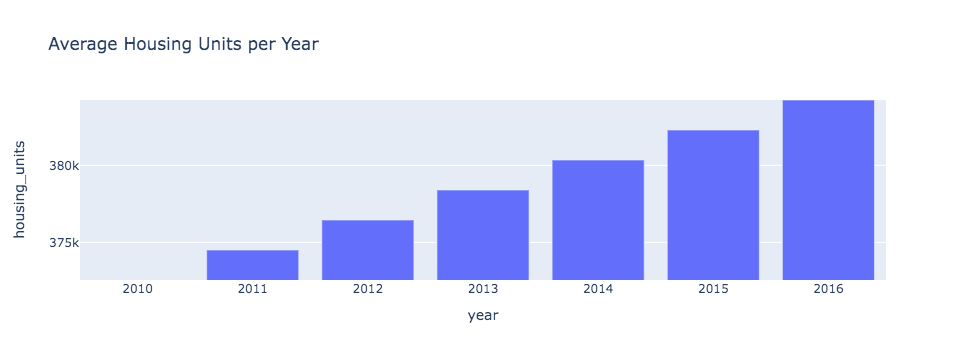

In [211]:
# Use the Pandas plot function to plot the average housing units per year.
# Note: You will need to manually adjust the y limit of the chart using the min and max values from above.
avg_housing = px.bar(
    sfo_group,
    x="year",
    y="housing_units",
    title="Average Housing Units per Year",
)

max_val=sfo_group['housing_units'].max()
min_val=sfo_group['housing_units'].min()

avg_housing.update_yaxes(range=[min_val, max_val])

avg_housing

# Optional Challenge: Use the min, max, and std to scale the y limits of the chart
# YOUR CODE HERE!

- - - 

## Average Housing Costs in San Francisco Per Year

In this section, you will calculate the average monthly rent and the average price per square foot for each year. An investor may wish to better understand the sales price of the rental property over time. For example, a customer will want to know if they should expect an increase or decrease in the property value over time so they can determine how long to hold the rental property.  Plot the results as two line charts.

**Optional challenge:** Plot each line chart in a different color.

In [212]:
# Calculate the average sale price per square foot and average gross rent
sfo_group_no_units = sfo_group.drop(columns = "housing_units")
sfo_group_no_units

,year,sale_price_sqr_foot,gross_rent
0,2010,369.344353,1239.0
1,2011,341.903429,1530.0
2,2012,399.389968,2324.0
3,2013,483.600304,2971.0
4,2014,556.277273,3528.0
5,2015,632.540352,3739.0
6,2016,697.643709,4390.0


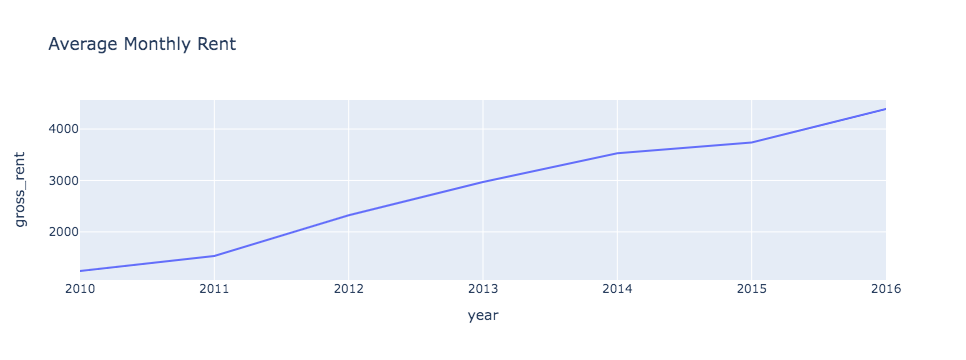

In [213]:
# Create two line charts, one to plot the average sale price per square foot and another for average montly rent

# Line chart for average sale price per square foot
average_price_foot = px.line(
    sfo_group_no_units,
    x="year",
    y="sale_price_sqr_foot",
    title="Average Sale Price per Square Foot per Year",
)

average_price_foot

# Line chart for average montly rent
average_monthly_rent = px.line(
    sfo_group_no_units,
    x="year",
    y="gross_rent",
    title="Average Monthly Rent",
)

average_monthly_rent

- - - 

## Average Prices by Neighborhood

In this section, you will use hvplot to create two interactive visulizations of average prices with a dropdown selector for the neighborhood. The first visualization will be a line plot showing the trend of average price per square foot over time for each neighborhood.  The second will be a line plot showing the trend of average montly rent over time for each neighborhood.

**Hint:** It will be easier to create a new DataFrame from grouping the data and calculating the mean prices for each year and neighborhood

In [255]:
# Group by year and neighborhood and then create a new dataframe of the mean values
sfo_group_two = sfo_data.groupby(["year", "neighborhood"]).mean().reset_index().round(2)
sfo_group_two

,year,neighborhood,sale_price_sqr_foot,housing_units,gross_rent
0,2010,Alamo Square,291.18,372560.0,1239.0
1,2010,Anza Vista,267.93,372560.0,1239.0
2,2010,Bayview,170.10,372560.0,1239.0
3,2010,Buena Vista Park,347.39,372560.0,1239.0
4,2010,Central Richmond,319.03,372560.0,1239.0
...,...,...,...,...,...
392,2016,Telegraph Hill,903.05,384242.0,4390.0
393,2016,Twin Peaks,970.09,384242.0,4390.0
394,2016,Van Ness/ Civic Center,552.60,384242.0,4390.0
395,2016,Visitacion Valley,328.32,384242.0,4390.0


In [267]:
# Use hvplot to create an interactive line chart of the average price per sq ft.
# The plot should have a dropdown selector for the neighborhood
price_per_foot = sfo_group_two.hvplot.line('year', 'sale_price_sqr_foot', groupby='neighborhood')
price_per_foot

:DynamicMap   [neighborhood]
   :Curve   [year]   (sale_price_sqr_foot)

In [265]:
# Use hvplot to create an interactive line chart of the average monthly rent.
# The plot should have a dropdown selector for the neighborhood
average_monthly_rent = sfo_group_two.hvplot.line('year', 'gross_rent', groupby='neighborhood')
average_monthly_rent

:DynamicMap   [neighborhood]
   :Curve   [year]   (gross_rent)

## The Top 10 Most Expensive Neighborhoods

In this section, you will need to calculate the mean sale price per square foot for each neighborhood and then sort the values to obtain the top 10 most expensive neighborhoods on average. Plot the results as a bar chart.

In [259]:
# Getting the data from the top 10 expensive neighborhoods to own
sfo_top_ten = sfo_data.groupby(["year", "neighborhood"]).mean().reset_index().round(2).iloc[:10]
sfo_top_ten

,year,neighborhood,sale_price_sqr_foot,housing_units,gross_rent
0,2010,Alamo Square,291.18,372560.0,1239.0
1,2010,Anza Vista,267.93,372560.0,1239.0
2,2010,Bayview,170.10,372560.0,1239.0
3,2010,Buena Vista Park,347.39,372560.0,1239.0
4,2010,Central Richmond,319.03,372560.0,1239.0
5,2010,Central Sunset,418.17,372560.0,1239.0
6,2010,Corona Heights,369.36,372560.0,1239.0
7,2010,Cow Hollow,569.38,372560.0,1239.0
8,2010,Croker Amazon,165.65,372560.0,1239.0
9,2010,Diamond Heights,456.93,372560.0,1239.0


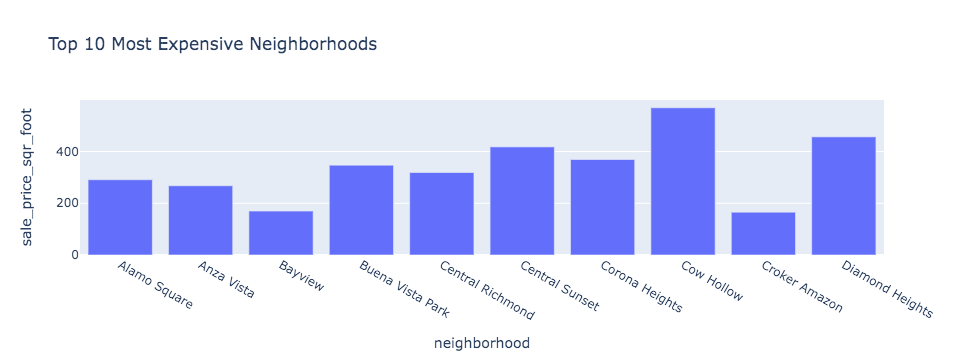

In [262]:
# Plotting the data from the top 10 expensive neighborhoods
top_ten_plot = px.bar(
    sfo_top_ten,
    x="neighborhood",
    y="sale_price_sqr_foot",
    title="Top 10 Most Expensive Neighborhoods",
)

top_ten_plot

- - - 

## Comparing cost to purchase versus rental income

In this section, you will use `hvplot` to create an interactive visualization with a dropdown selector for the neighborhood. This visualization will feature a side-by-side comparison of average price per square foot versus average montly rent by year.  

**Hint:** Use the `hvplot` parameter, `groupby`, to create a dropdown selector for the neighborhood.

In [261]:
# Fetch the previously generated DataFrame that was grouped by year and neighborhood
sfo_group_two

,year,neighborhood,sale_price_sqr_foot,housing_units,gross_rent
0,2010,Alamo Square,291.18,372560.0,1239.0
1,2010,Anza Vista,267.93,372560.0,1239.0
2,2010,Bayview,170.10,372560.0,1239.0
3,2010,Buena Vista Park,347.39,372560.0,1239.0
4,2010,Central Richmond,319.03,372560.0,1239.0
...,...,...,...,...,...
392,2016,Telegraph Hill,903.05,384242.0,4390.0
393,2016,Twin Peaks,970.09,384242.0,4390.0
394,2016,Van Ness/ Civic Center,552.60,384242.0,4390.0
395,2016,Visitacion Valley,328.32,384242.0,4390.0


In [264]:
# Plotting the data from the top 10 expensive neighborhoods
price_vs_rent = sfo_group_two.hvplot.bar('year', ['gross_rent', 'sale_price_sqr_foot'], groupby = 'neighborhood')
price_vs_rent

:DynamicMap   [neighborhood]
   :Bars   [year,Variable]   (value)

- - - 

## Neighborhood Map

In this section, you will read in neighborhoods location data and build an interactive map with the average house value per neighborhood. Use a `scatter_mapbox` from Plotly express to create the visualization. Remember, you will need your Mapbox API key for this.

### Load Location Data

In [280]:
# Load neighborhoods coordinates data
mapbox_data = pd.read_csv(Path("Data/neighborhoods_coordinates.csv"))
mapbox_data.head()

,Neighborhood,Lat,Lon
0,Alamo Square,37.791012,-122.402100
1,Anza Vista,37.779598,-122.443451
2,Bayview,37.734670,-122.401060
3,Bayview Heights,37.728740,-122.410980
4,Bernal Heights,37.728630,-122.443050


### Data Preparation

You will need to join the location data with the mean values per neighborhood.

1. Calculate the mean values for each neighborhood.

2. Join the average values with the neighborhood locations.

In [278]:
# Calculate the mean values for each neighborhood
neighborhood_group = sfo_data.groupby("neighborhood").mean().reset_index()
neighborhood_group

,neighborhood,year,sale_price_sqr_foot,housing_units,gross_rent
0,Alamo Square,2013.000000,366.020712,378401.00,2817.285714
1,Anza Vista,2013.333333,373.382198,379050.00,3031.833333
2,Bayview,2012.000000,204.588623,376454.00,2318.400000
3,Bayview Heights,2015.000000,590.792839,382295.00,3739.000000
4,Bernal Heights,2013.500000,576.746488,379374.50,3080.333333
...,...,...,...,...,...
68,West Portal,2012.250000,498.488485,376940.75,2515.500000
69,Western Addition,2012.500000,307.562201,377427.50,2555.166667
70,Westwood Highlands,2012.000000,533.703935,376454.00,2250.500000
71,Westwood Park,2015.000000,687.087575,382295.00,3959.000000


In [279]:
# Join the average values with the neighborhood locations
joined_df = pd.concat([neighborhood_group, mapbox_data], axis='columns', join='inner')
joined_df

,neighborhood,year,sale_price_sqr_foot,housing_units,gross_rent,Neighborhood,Lat,Lon
0,Alamo Square,2013.000000,366.020712,378401.00,2817.285714,Alamo Square,37.791012,-122.402100
1,Anza Vista,2013.333333,373.382198,379050.00,3031.833333,Anza Vista,37.779598,-122.443451
2,Bayview,2012.000000,204.588623,376454.00,2318.400000,Bayview,37.734670,-122.401060
3,Bayview Heights,2015.000000,590.792839,382295.00,3739.000000,Bayview Heights,37.728740,-122.410980
4,Bernal Heights,2013.500000,576.746488,379374.50,3080.333333,Bernal Heights,37.728630,-122.443050
...,...,...,...,...,...,...,...,...
68,West Portal,2012.250000,498.488485,376940.75,2515.500000,West Portal,37.740260,-122.463880
69,Western Addition,2012.500000,307.562201,377427.50,2555.166667,Western Addition,37.792980,-122.435790
70,Westwood Highlands,2012.000000,533.703935,376454.00,2250.500000,Westwood Highlands,37.734700,-122.456854
71,Westwood Park,2015.000000,687.087575,382295.00,3959.000000,Westwood Park,37.734150,-122.457000


### Mapbox Visualization

Plot the average values per neighborhood using a Plotly express `scatter_mapbox` visualization.

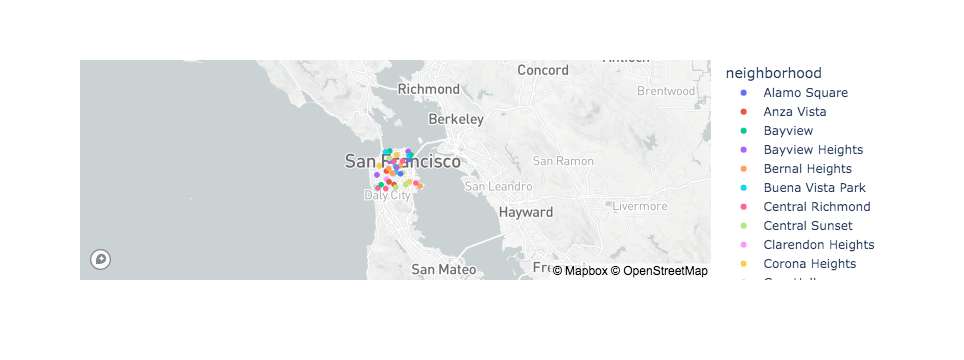

In [282]:
# Set the mapbox access token
px.set_mapbox_access_token(mapbox_api)

# Create a scatter mapbox to analyze neighborhood info
scatter_map = px.scatter_mapbox(
    joined_df,
    lat="Lat",
    lon="Lon",
    color="neighborhood"
)
scatter_map.show()

- - -

## Cost Analysis - Optional Challenge

In this section, you will use Plotly express to create visualizations that investors can use to interactively filter and explore various factors related to the house value of the San Francisco's neighborhoods. 

### Create a DataFrame showing the most expensive neighborhoods in San Francisco by year

In [20]:
# Fetch the data from all expensive neighborhoods per year.
df_expensive_neighborhoods_per_year = df_costs[df_costs["neighborhood"].isin(df_expensive_neighborhoods["neighborhood"])]
df_expensive_neighborhoods_per_year.head()

,year,neighborhood,sale_price_sqr_foot,housing_units,gross_rent
7,2010,Cow Hollow,569.379968,372560,1239
31,2010,Miraloma Park,680.608729,372560,1239
41,2010,Pacific Heights,496.516014,372560,1239
46,2010,Potrero Hill,491.450004,372560,1239
47,2010,Presidio Heights,549.417931,372560,1239


### Create a parallel coordinates plot and parallel categories plot of most expensive neighborhoods in San Francisco per year


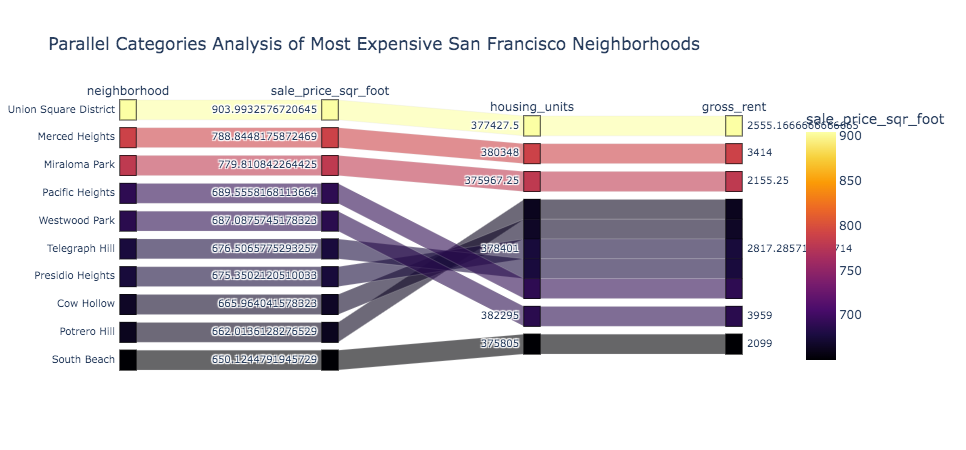

In [21]:
# Parallel Categories Plot
# YOUR CODE HERE!

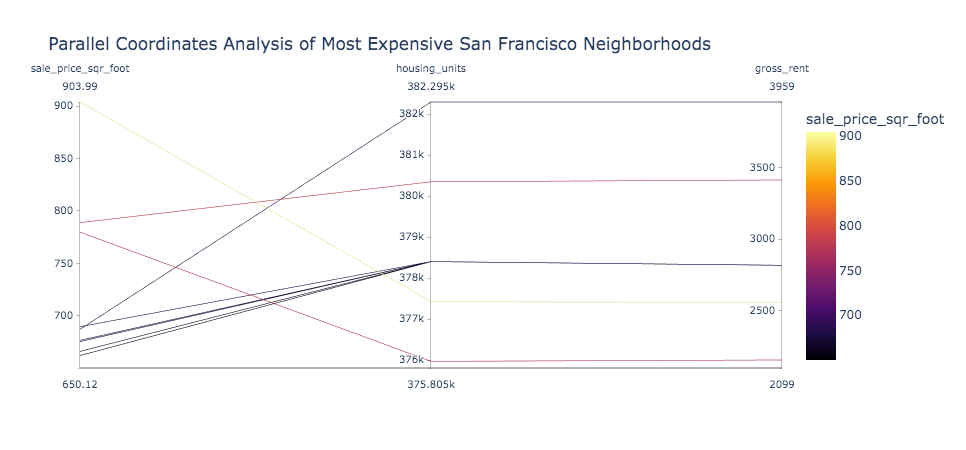

In [22]:
# Parallel Coordinates Plot
# YOUR CODE HERE!

### Create a sunburst chart to conduct a costs analysis of most expensive neighborhoods in San Francisco per year

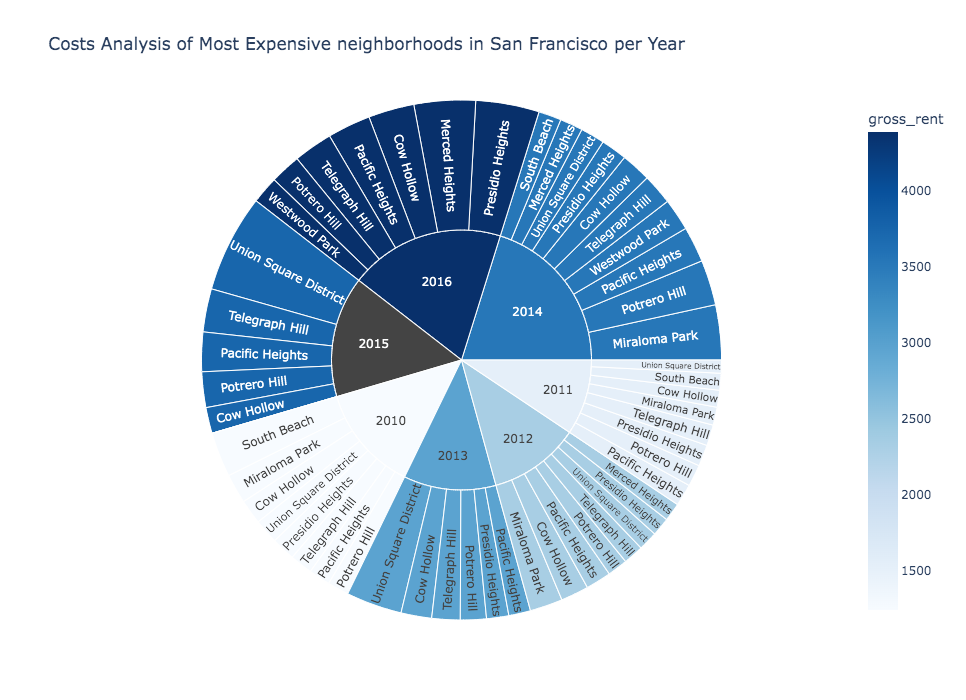

In [23]:
# Sunburst Plot
# YOUR CODE HERE!